In [14]:
from google.colab import files
uploaded = files.upload()

Saving Concrete_Data.xls.csv to Concrete_Data.xls.csv


Cleaned Data:
      Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
...                                         ...   
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   0.0       
1                                                   0.0       
2                                                 142.5       
3                                                 142.5       
4                                                 132.4   

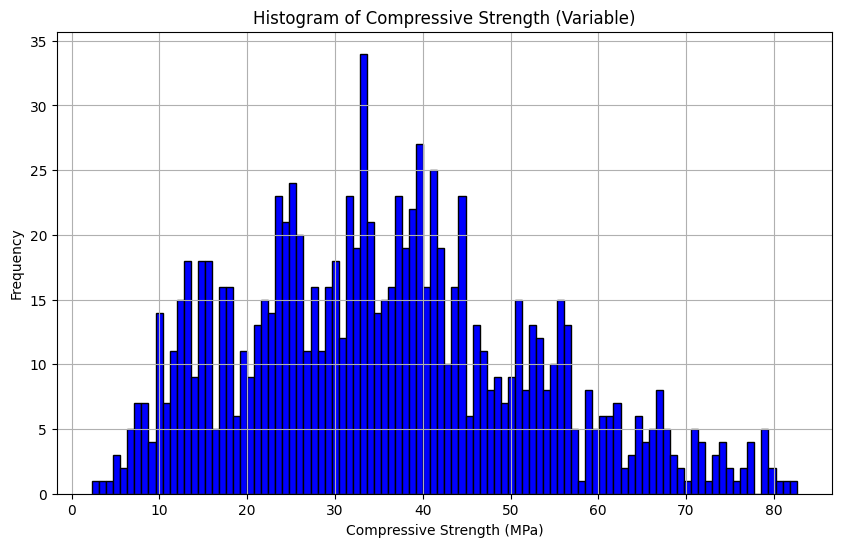

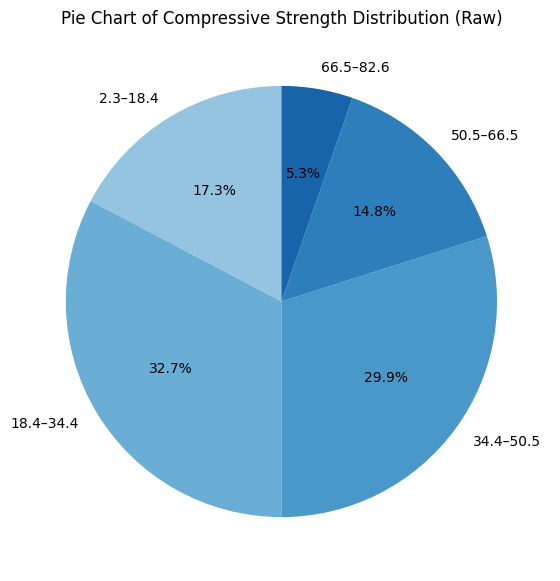

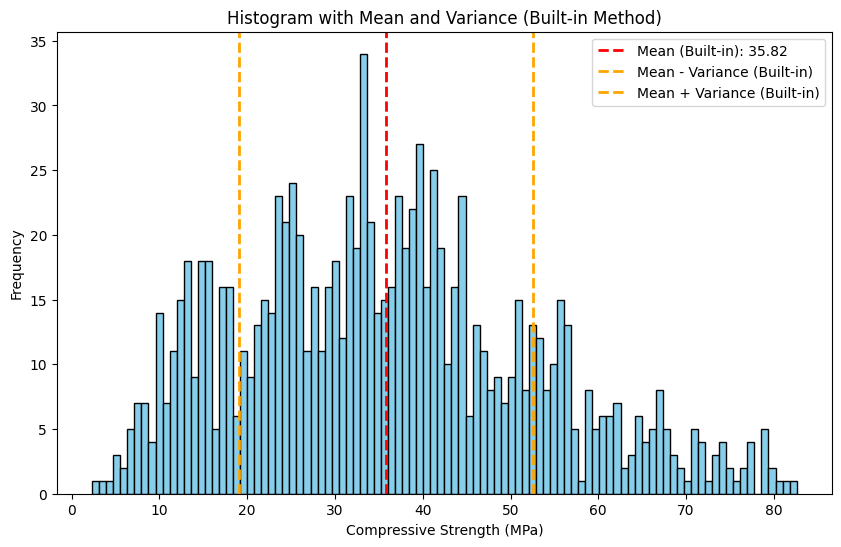

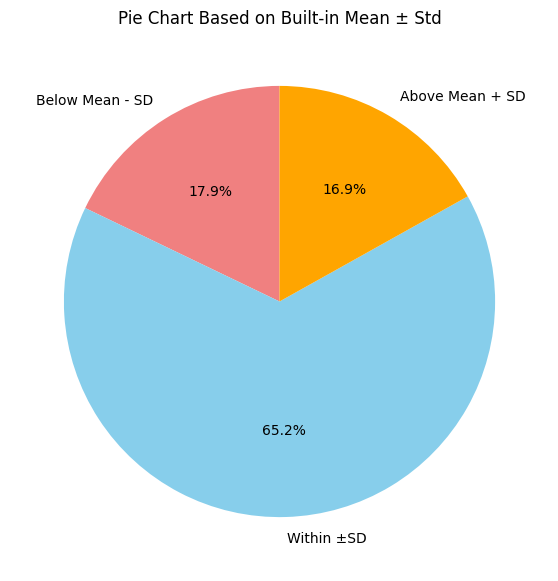

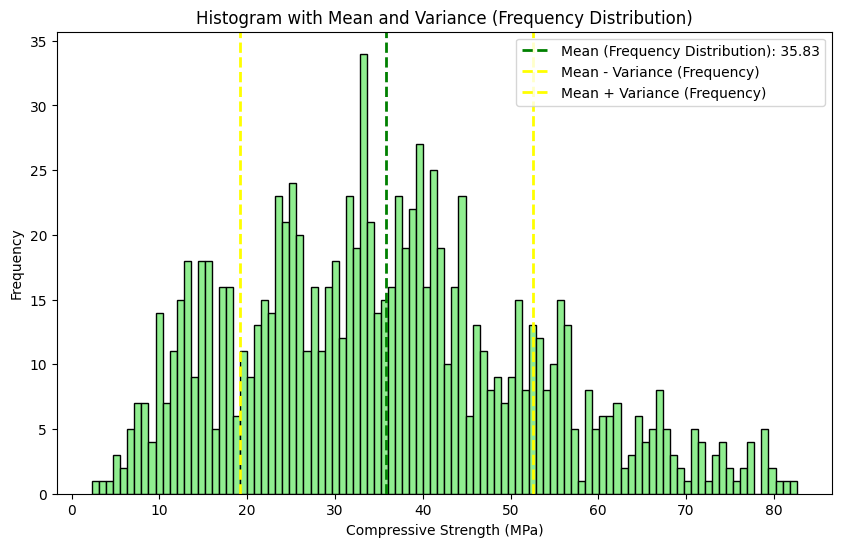

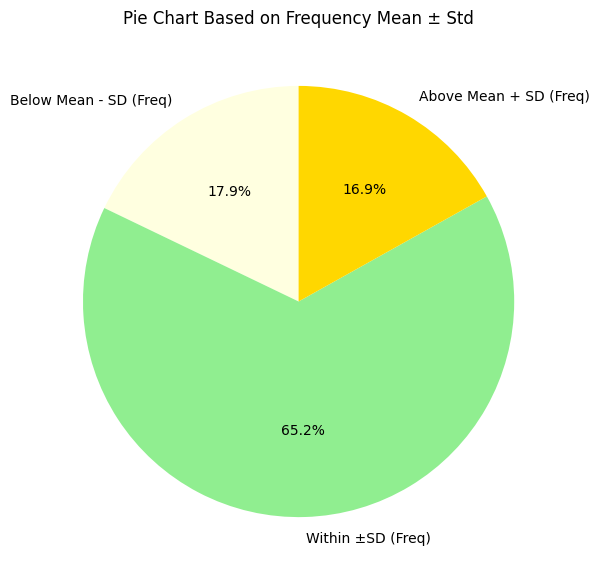


95% Confidence Interval for Mean: [35.36, 37.76]
95% Confidence Interval for Variance: [280.28, 340.06]
95% Tolerance Interval: [2.14, 70.98]
Validation: 205 out of 206 (99.51%) values lie within the 95% tolerance interval.

Hypothesis Test:
T-statistic: 2.548
P-value: 0.01102
Reject the null hypothesis: Mean is significantly greater than 35 MPa.


In [17]:
#ES PROJECT- CONCRETE DATA
#2024540
#2024626
#2024281
import pandas as pd
import statistics as st
import matplotlib.pyplot as mb
import numpy as np

# Load the dataset
data = pd.read_csv("Concrete_Data.xls.csv")

# Clean the data by dropping all nan values in rows
data_cleaned = data.dropna(axis=0)

# Print the cleaned data
print("Cleaned Data:")
print(data_cleaned)

# Extract the target column
strength = data_cleaned['Concrete compressive strength(MPa, megapascals) ']

# Built-in mean and variance
mean_builtin = st.mean(strength)
variance_builtin = st.variance(strength)
print(f"Mean (built-in): {mean_builtin}")
print(f"Variance (built-in): {variance_builtin}")

# Frequency distribution-based mean and variance
counts, bin_edges = np.histogram(strength, bins=100)
mid_points = (bin_edges[1:] + bin_edges[:-1]) / 2

# Calculate mean from frequency distribution
mean_freq = np.sum(counts * mid_points) / np.sum(counts)

# Calculate variance from frequency distribution
variance_freq = np.sum(counts * (mid_points - mean_freq)**2) / np.sum(counts)

print(f"Mean from frequency distribution: {mean_freq}")
print(f"Variance from frequency distribution: {variance_freq}")

# Plot 1: Histogram of the Variable (Compressive Strength)
mb.figure(figsize=(10, 6))
mb.hist(strength, bins=100, color='blue', edgecolor='black')
mb.title("Histogram of Compressive Strength (Variable)")
mb.xlabel("Compressive Strength (MPa)")
mb.ylabel("Frequency")
mb.grid(True)
mb.show()

# Pie Chart 1: Distribution from raw histogram (same bins)
counts1, bins1 = np.histogram(strength, bins=5)  # Fewer bins for clearer pie chart
labels1 = [f"{round(bins1[i], 1)}–{round(bins1[i+1], 1)}" for i in range(len(bins1)-1)]

mb.figure(figsize=(7, 7))
mb.pie(counts1, labels=labels1, autopct='%1.1f%%', startangle=90, colors=mb.cm.Blues(np.linspace(0.4, 0.8, len(counts1))))
mb.title("Pie Chart of Compressive Strength Distribution (Raw)")
mb.show()


# Plot 2: Mean and Variance (Built-in Method)
mb.figure(figsize=(10, 6))
mb.hist(strength, bins=100, color='skyblue', edgecolor='black')
mb.axvline(mean_builtin, color='red', linestyle='dashed', linewidth=2, label=f'Mean (Built-in): {mean_builtin:.2f}')
mb.axvline(mean_builtin - np.sqrt(variance_builtin), color='orange', linestyle='dashed', linewidth=2, label=f'Mean - Variance (Built-in)')
mb.axvline(mean_builtin + np.sqrt(variance_builtin), color='orange', linestyle='dashed', linewidth=2, label=f'Mean + Variance (Built-in)')
mb.title("Histogram with Mean and Variance (Built-in Method)")
mb.xlabel("Compressive Strength (MPa)")
mb.ylabel("Frequency")
mb.legend()
mb.show()

# Pie Chart 2: Categorize based on mean ± std from built-in method
low = (strength < mean_builtin - np.sqrt(variance_builtin)).sum()
mid = ((strength >= mean_builtin - np.sqrt(variance_builtin)) & (strength <= mean_builtin + np.sqrt(variance_builtin))).sum()
high = (strength > mean_builtin + np.sqrt(variance_builtin)).sum()

mb.figure(figsize=(7, 7))
mb.pie([low, mid, high],
       labels=["Below Mean - SD", "Within ±SD", "Above Mean + SD"],
       autopct='%1.1f%%',
       colors=['lightcoral', 'skyblue', 'orange'],
       startangle=90)
mb.title("Pie Chart Based on Built-in Mean ± Std")
mb.show()


# Plot 3: Frequency-based Mean and Variance
mb.figure(figsize=(10, 6))
mb.hist(strength, bins=100, color='lightgreen', edgecolor='black')
mb.axvline(mean_freq, color='green', linestyle='dashed', linewidth=2, label=f'Mean (Frequency Distribution): {mean_freq:.2f}')
mb.axvline(mean_freq - np.sqrt(variance_freq), color='yellow', linestyle='dashed', linewidth=2, label=f'Mean - Variance (Frequency)')
mb.axvline(mean_freq + np.sqrt(variance_freq), color='yellow', linestyle='dashed', linewidth=2, label=f'Mean + Variance (Frequency)')
mb.title("Histogram with Mean and Variance (Frequency Distribution)")
mb.xlabel("Compressive Strength (MPa)")
mb.ylabel("Frequency")
mb.legend()
mb.show()

# Pie Chart 3: Based on frequency mean ± std
low_f = (strength < mean_freq - np.sqrt(variance_freq)).sum()
mid_f = ((strength >= mean_freq - np.sqrt(variance_freq)) & (strength <= mean_freq + np.sqrt(variance_freq))).sum()
high_f = (strength > mean_freq + np.sqrt(variance_freq)).sum()

mb.figure(figsize=(7, 7))
mb.pie([low_f, mid_f, high_f],
       labels=["Below Mean - SD (Freq)", "Within ±SD (Freq)", "Above Mean + SD (Freq)"],
       autopct='%1.1f%%',
       colors=['lightyellow', 'lightgreen', 'gold'],
       startangle=90)
mb.title("Pie Chart Based on Frequency Mean ± Std")
mb.show()


from scipy import stats

# ------------------------------
# Step 1: Split the data (80% for analysis, 20% for validation)
split_index = int(0.8 * len(strength))
strength_80 = strength.iloc[:split_index]
strength_20 = strength.iloc[split_index:]

# Step 2: Calculate sample statistics for 80%
n = len(strength_80)
sample_mean = st.mean(strength_80)
sample_std = st.stdev(strength_80)

# 95% Confidence Interval for the Mean (t-distribution)
conf_level = 0.95
alpha = 1 - conf_level
t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
margin_error = t_crit * (sample_std / np.sqrt(n))
ci_mean_lower = sample_mean - margin_error
ci_mean_upper = sample_mean + margin_error

print(f"\n95% Confidence Interval for Mean: [{ci_mean_lower:.2f}, {ci_mean_upper:.2f}]")

# 95% Confidence Interval for Variance (chi-square distribution)
sample_var = st.variance(strength_80)
chi2_lower = stats.chi2.ppf(alpha / 2, df=n - 1)
chi2_upper = stats.chi2.ppf(1 - alpha / 2, df=n - 1)
ci_var_lower = (n - 1) * sample_var / chi2_upper
ci_var_upper = (n - 1) * sample_var / chi2_lower

print(f"95% Confidence Interval for Variance: [{ci_var_lower:.2f}, {ci_var_upper:.2f}]")

# Step 3: 95% Tolerance Interval (k-factor from normal dist)
k_factor = stats.norm.ppf(1 - alpha / 2) * np.sqrt(1 + 1/n)
tol_lower = sample_mean - k_factor * sample_std
tol_upper = sample_mean + k_factor * sample_std

print(f"95% Tolerance Interval: [{tol_lower:.2f}, {tol_upper:.2f}]")

# Step 4: Validation using the remaining 20% data
within_interval = ((strength_20 >= tol_lower) & (strength_20 <= tol_upper)).sum()
total_20 = len(strength_20)
percentage_within = (within_interval / total_20) * 100

print(f"Validation: {within_interval} out of {total_20} ({percentage_within:.2f}%) values lie within the 95% tolerance interval.")

# ------------------------------
# Step 5: Hypothesis Testing
# Hypothesis: H0: mean <= 35, H1: mean > 35 (One-tailed t-test)
hypothesized_mean = 35
t_statistic, p_value = stats.ttest_1samp(strength_80, popmean=hypothesized_mean)

print("\nHypothesis Test:")
print(f"T-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.5f}")

if p_value / 2 < 0.05 and t_statistic > 0:
    print("Reject the null hypothesis: Mean is significantly greater than 35 MPa.")
else:
    print("Fail to reject the null hypothesis: Not enough evidence that mean > 35 MPa.")

